In [1]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="0"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/21_category/224/2k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 358.6518566608429 seconds


In [4]:
len(X_train)

33600

In [5]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/21_category/224/2k/X_validate.npy')

print('Loading X_test...')
X_test = np.load('/home/zxt/data/21_category/224/2k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/21_category/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/21_category/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/21_category/224/2k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_validate...
Loading X_test...
Loading labels...
Running time: 80.72098684310913 seconds


In [ ]:
# X_validate = np.vstack((X_validate_part1, X_validate_part2))

In [6]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (33600, 224, 224, 3)
33600 train samples
4200 validate samples
4200 test samples


In [7]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [8]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20  

In [9]:
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20   

In [10]:
for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20 

In [11]:
# one-hot encoder[only accpet int]
y_train=np_utils.to_categorical(Y_train,21)
y_validate=np_utils.to_categorical(Y_validate,21)
y_test=np_utils.to_categorical(Y_test,21)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 2.Model structure

In [24]:
def alexnet(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [25]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [26]:
from keras.callbacks import Callback
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3.Modeling

In [27]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
n_classes = 21
input_shape = 224,224,3

In [32]:
K.clear_session()
model = alexnet(input_shape, n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0   

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [34]:
num_classes = 21
f1_metrics = Metrics()

In [35]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping,f1_metrics],
    validation_data = (X_validate,y_validate))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 33600 samples, validate on 4200 samples
Epoch 1/30
33600/33600 [==============================] - 163s 5ms/step - loss: 1.7090 - accuracy: 0.4485 - val_loss: 2.7775 - val_accuracy: 0.1600


/home/zxt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/zxt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


val_f1: 0.0975 - val_precision: 0.1098 - val_recall: 0.1628
Epoch 2/30
33600/33600 [==============================] - 156s 5ms/step - loss: 1.1519 - accuracy: 0.6026 - val_loss: 1.2900 - val_accuracy: 0.5495
val_f1: 0.5324 - val_precision: 0.6016 - val_recall: 0.5471
Epoch 3/30
33600/33600 [==============================] - 156s 5ms/step - loss: 0.9434 - accuracy: 0.6715 - val_loss: 1.2524 - val_accuracy: 0.5619
val_f1: 0.5581 - val_precision: 0.6316 - val_recall: 0.5585
Epoch 4/30
33600/33600 [==============================] - 156s 5ms/step - loss: 0.7934 - accuracy: 0.7256 - val_loss: 1.3532 - val_accuracy: 0.5317
val_f1: 0.5253 - val_precision: 0.6340 - val_recall: 0.5317
Epoch 5/30
33600/33600 [==============================] - 156s 5ms/step - loss: 0.6776 - accuracy: 0.7679 - val_loss: 1.0221 - val_accuracy: 0.6555
val_f1: 0.6479 - val_precision: 0.6886 - val_recall: 0.6545
Epoch 6/30
33600/33600 [==============================] - 156s 5ms/step - loss: 0.5664 - accuracy: 0.8092 - 

In [30]:
# parallel_model.save('/home/zxt/data/model/alex_basic_5k_224.h5')

In [26]:
model.save('/home/zxt/data/model/21category/alex_basic_5k_224_model.h5')

### 4.Evaluation

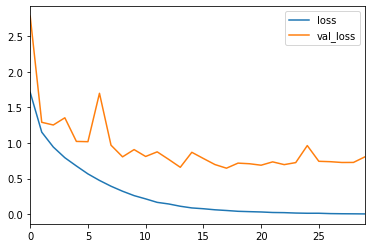

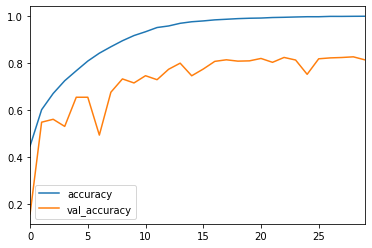

In [37]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [38]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

4200/4200 [==============================] - 9s 2ms/step

test loss 0.8142976254508609
accuracy 0.817380964756012


In [39]:
y_pred = model.predict(X_test,batch_size=1)

In [40]:
y_pred

array([[3.8149800e-12, 9.0353393e-07, 1.8815355e-14, ..., 1.6724912e-12,
        9.9998093e-01, 3.0550753e-11],
       [7.2044806e-09, 9.2051196e-06, 1.5537491e-08, ..., 5.2588021e-08,
        1.9579588e-06, 1.2377786e-01],
       [5.2562765e-10, 1.5402865e-07, 1.0547163e-09, ..., 1.8529675e-13,
        1.1614413e-05, 1.4741560e-06],
       ...,
       [3.8067546e-06, 1.1471852e-03, 1.7315752e-08, ..., 2.0481225e-07,
        3.6769390e-02, 8.8648102e-09],
       [2.1530324e-09, 5.6280100e-01, 6.8652944e-12, ..., 1.7698509e-09,
        1.1787344e-07, 4.3896731e-09],
       [1.2530012e-11, 5.3572489e-12, 3.1393306e-12, ..., 1.6597470e-12,
        2.7577189e-11, 9.9998796e-01]], dtype=float32)

In [41]:
len(y_pred)

4200

### 6.Check each categoryaccuracy

In [42]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [43]:
y_prediction[:5]

[19, 12, 7, 12, 10]

In [44]:
Y_test[:5]

array([['19'],
       ['12'],
       ['7'],
       ['12'],
       ['0']], dtype='<U16')

In [45]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [46]:
y_real.head(2)

,label
0,19
1,12


In [47]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [48]:

y_predict.head(2)

,label_pre
0,19
1,12


In [49]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [50]:
prediction_df

,label,label_pre,diff
0,19,19,0
1,12,12,0
2,7,7,0
3,12,12,0
4,0,10,-10
...,...,...,...
4195,9,9,0
4196,10,10,0
4197,17,17,0
4198,15,1,14


In [51]:
prediction_df.to_csv(r'/home/zxt/data/results/prediction_df.csv',index=False)

In [52]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s acc: %10.3f" %(name,acc) )

elephant acc:      0.662
wild_boar acc:      0.692
gazellethomosons acc:      0.905
squirrel acc:      0.889
hedgehog acc:      0.917
guineafowl acc:      0.879
moose acc:      0.968
coyote acc:      0.760
bird acc:      0.892
fox acc:      0.807
giraffe acc:      0.821
buffalo acc:      0.761
hare acc:      0.920
vehicle acc:      0.854
wildebeest acc:      0.695
cattle acc:      0.560
skunk acc:      0.847
lion acc:      0.744
zebra acc:      0.790
black_bear acc:      0.808
racoon acc:      0.982
